# GISAID Transformation

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'gisaid_variants_statistics_2024_11_02_2052.xlsx'
excel_data = pd.ExcelFile(file_path)

# Initialize an empty DataFrame to store the final data
final_df = pd.DataFrame(columns=['Country', 'Attribute', 'Value', 'Variant'])



In [2]:
for i, sheet_name in enumerate(excel_data.sheet_names[1:], start=1):
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_data, sheet_name=sheet_name)
    
    # Extract the variant name from the sheet name
    variant_name = sheet_name.split()[-1]
    
    # Create a variable with the variant name and assign the DataFrame to it
    globals()[f'df_{variant_name}'] = df
    # Print the variant name or store it somewhere if needed
    print(f'df_{variant_name} created')

df_Omicron created
df_Delta created
df_Alpha created
df_Beta created
df_Gamma created
df_Epsilon created
df_Zeta created
df_Eta created
df_Theta created
df_Iota created
df_Kappa created
df_Lambda created


In [3]:
# List to store all DataFrames
all_dfs = []

# Loop through the sheet names starting from the second sheet
for sheet_name in excel_data.sheet_names[1:]:
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_data, sheet_name=sheet_name)
    
    # Extract the variant name from the sheet name
    variant_name = sheet_name.split()[-1]
    
    # Rename the first column to 'country'
    df.columns = ['country'] + list(df.columns[1:])
    
    # Remove rows where the 'country' column has NaN values
    df = df.dropna(subset=['country'])
    
    # Remove the second column
    df.drop(df.columns[1], axis=1, inplace=True)
    
    # Reshape the DataFrame
    df = pd.melt(df, id_vars=['country'], var_name='Date', value_name='Value')
    
    # Change NaN values to 0 in the 'Value' column
    df['Value'].fillna(0, inplace=True)
    
    # Add a column for the variant name
    df['Variant'] = variant_name
    
    # Append the DataFrame to the list
    all_dfs.append(df)
    

# Combine all DataFrames into one
combined_df = pd.concat(all_dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame to verify
print(combined_df.head())


C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\4205344510.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(0, inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\4205344510.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

          country        Date  Value  Variant
0     Afghanistan  2019-12-29    0.0  Omicron
1         Albania  2019-12-29    0.0  Omicron
2         Algeria  2019-12-29    0.0  Omicron
3  American Samoa  2019-12-29    0.0  Omicron
4         Andorra  2019-12-29    0.0  Omicron


C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\4205344510.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(0, inplace=True)


In [4]:
combined_df['Variant'].unique()

array(['Omicron', 'Delta', 'Alpha', 'Beta', 'Gamma', 'Epsilon', 'Zeta',
       'Eta', 'Theta', 'Iota', 'Kappa', 'Lambda'], dtype=object)

In [5]:
combined_df.to_excel('Combined_all_1.xlsx', index=False)

C:\Users\sharm\AppData\Local\Temp\ipykernel_37856\1788155634.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  combined_df.to_excel('Combined_all_1.xlsx', index=False)


In [5]:
combined_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canary Islands', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Crimea', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'F

# Vaccination Transformation world covid data.

In [6]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'vaccinations_global.csv'
excel_data = pd.read_csv(file_path)

# Initialize the DataFrame with the selected columns
Vaccination_df = excel_data[['country', 'date', 'daily_vaccinations_smoothed']]


In [7]:
Vaccination_df.rename(columns={'country': 'location','daily_vaccinations_smoothed':'daily_vaccinations'}, inplace=True)



C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\3836976329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccination_df.rename(columns={'country': 'location','daily_vaccinations_smoothed':'daily_vaccinations'}, inplace=True)


In [8]:
Vaccination_df['daily_vaccinations'].fillna(0, inplace=True)

# Round down decimal values to the nearest lower integer
Vaccination_df['daily_vaccinations'] = np.floor(Vaccination_df['daily_vaccinations']).astype(int)

C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\171703304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Vaccination_df['daily_vaccinations'].fillna(0, inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\171703304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccination_df['daily_vaccinations'].fillna(0, inplace=True)

In [9]:
Vaccination_df.head()

,location,date,daily_vaccinations
0,Afghanistan,2021-02-22,0
1,Afghanistan,2021-02-23,1366
2,Afghanistan,2021-02-24,1366
3,Afghanistan,2021-02-25,1366
4,Afghanistan,2021-02-26,1366


In [10]:

import numpy as np

df1 = pd.read_excel(r'C:\Users\sharm\Documents\My Folder\Project_SARS\Combined_all.xlsx')
df2 = pd.read_excel(r'C:\Users\sharm\Documents\My Folder\Project_SARS\Vaccination_22.xlsx')






In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453096 entries, 0 to 453095
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    453096 non-null  object        
 1   Attribute  453096 non-null  datetime64[ns]
 2   Value      453096 non-null  int64         
 3   Variant    453096 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.8+ MB


In [12]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160730 entries, 0 to 160729
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   location            160730 non-null  object        
 1   date                160730 non-null  datetime64[ns]
 2   daily_vaccinations  160730 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ MB


In [13]:
# Define both arrays (ensure they are complete)
dddd = np.array([df1['Country'].unique()])  # Fill in the array with all values
ffff = np.array([df2['location'].unique()])  # Fill in the array with all values

# Find differences
in_combined_not_vaccination = np.setdiff1d(dddd, ffff)
in_vaccination_not_combined = np.setdiff1d(ffff, dddd)

print("In Combined_df but not in Vaccination_df:", in_combined_not_vaccination)
print("In Vaccination_df but not in Combined_df:", in_vaccination_not_combined)

In Combined_df but not in Vaccination_df: ['American Samoa' 'Bonaire' 'Cabo Verde' 'Canary Islands' 'Crimea'
 'Czech Republic' 'Democratic Republic of the Congo' 'Faroe Islands'
 'French Guiana' 'Guadeloupe' 'Guam' 'Marshall Islands' 'Martinique'
 'Mayotte' 'Micronesia' 'Northern Mariana Islands' 'Palau' 'Puerto Rico'
 'Republic of the Congo' 'Reunion' 'Saint Barthelemy' 'Saint Martin'
 'Sint Maarten' 'The Bahamas' 'Timor-Leste' 'U.S. Virgin Islands'
 'Wallis and Futuna Islands']
In Vaccination_df but not in Combined_df: ['Bahamas' 'Bonaire Sint Eustatius and Saba' 'Cape Verde' 'Congo'
 'Cook Islands' 'Czechia' 'Democratic Republic of Congo' 'England'
 'Faeroe Islands' 'Falkland Islands' 'Greenland' 'Guernsey' 'Isle of Man'
 'Jersey' 'Nauru' 'Niue' 'Northern Cyprus' 'Northern Ireland' 'Oceania'
 'Pitcairn' 'Saint Helena' 'Samoa' 'San Marino' 'Scotland'
 'Sint Maarten (Dutch part)' 'Tajikistan' 'Timor' 'Tokelau' 'Tonga'
 'Turkmenistan' 'Tuvalu' 'Wales' 'Wallis and Futuna' 'Yemen']


In [14]:
# Replace 'USA' with 'United States' in the 'country' column
Vaccination_df['location'] = Vaccination_df['location'].replace('USA', 'United States')

# Display the DataFrame to confirm the change
Vaccination_df['location'].unique()


C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\2093859242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccination_df['location'] = Vaccination_df['location'].replace('USA', 'United States')


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'E

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160730 entries, 0 to 160729
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   location            160730 non-null  object        
 1   date                160730 non-null  datetime64[ns]
 2   daily_vaccinations  160730 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ MB


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453096 entries, 0 to 453095
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    453096 non-null  object        
 1   Attribute  453096 non-null  datetime64[ns]
 2   Value      453096 non-null  int64         
 3   Variant    453096 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.8+ MB


In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309880 entries, 0 to 309879
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  309880 non-null  object 
 1   Date     309880 non-null  object 
 2   Value    309880 non-null  float64
 3   Variant  309880 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.5+ MB


In [18]:
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce')

In [19]:
Vaccination_df['date'] = pd.to_datetime(Vaccination_df['date'], errors='coerce')

C:\Users\sharm\AppData\Local\Temp\ipykernel_45496\3864680177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vaccination_df['date'] = pd.to_datetime(Vaccination_df['date'], errors='coerce')


In [20]:
combined_df.rename(columns={'country': 'Country','Date':'Attribute'}, inplace=True)



In [21]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309880 entries, 0 to 309879
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    309880 non-null  object        
 1   Attribute  309880 non-null  datetime64[ns]
 2   Value      309880 non-null  float64       
 3   Variant    309880 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.5+ MB


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453096 entries, 0 to 453095
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Country    453096 non-null  object        
 1   Attribute  453096 non-null  datetime64[ns]
 2   Value      453096 non-null  int64         
 3   Variant    453096 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 13.8+ MB


In [23]:

max_date_df1 = df1['Attribute'].max()

filtered_combined_df = combined_df[combined_df['Attribute'] > max_date_df1]

unique_countries_df1 = df1['Country'].unique()

filtered_combined_df = filtered_combined_df[filtered_combined_df['Country'].isin(unique_countries_df1)]


merged_df = pd.concat([df1, filtered_combined_df], ignore_index=True)




In [24]:
df1['Attribute'].min()

Timestamp('2019-12-29 00:00:00')

In [25]:
merged_df['Attribute'].min()

Timestamp('2019-12-29 00:00:00')

In [26]:

max_date_df2 = df2['date'].max()

filtered_combined_df2 = Vaccination_df[Vaccination_df['date'] > max_date_df2]

unique_countries_df2 = df2['location'].unique()


filtered_combined_df2 = filtered_combined_df2[filtered_combined_df2['location'].isin(unique_countries_df2)]


merged_df2 = pd.concat([df2, filtered_combined_df2], ignore_index=True)

merged_df2.head()

,location,date,daily_vaccinations
0,Norway,2020-12-02,0
1,Norway,2020-12-03,1
2,Latvia,2020-12-04,0
3,Norway,2020-12-04,1
4,Latvia,2020-12-05,0


In [27]:
merged_df2['date'].max()

Timestamp('2024-08-12 00:00:00')

In [28]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184637 entries, 0 to 184636
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   location            184637 non-null  object        
 1   date                184637 non-null  datetime64[ns]
 2   daily_vaccinations  184637 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.2+ MB


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160730 entries, 0 to 160729
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   location            160730 non-null  object        
 1   date                160730 non-null  datetime64[ns]
 2   daily_vaccinations  160730 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.7+ MB


In [88]:
merged_df.to_excel('Variant.xlsx', index=False)


C:\Users\sharm\AppData\Local\Temp\ipykernel_5148\2172637706.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  merged_df.to_excel('Variant.xlsx', index=False)


In [89]:
merged_df2.to_excel('Vaccination_24.xlsx', index=False)


C:\Users\sharm\AppData\Local\Temp\ipykernel_5148\2652722535.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  merged_df2.to_excel('Vaccination_24.xlsx', index=False)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load datasets
variant_df = merged_df      # Contains country, date, cases, variant
vaccine_df = pd.read_csv("locations.csv")       # Contains vaccine doses by manufacturer
#population_df = pd.read_csv("population.csv")      # Optional: country, population




In [31]:
vaccine_df.head()

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",11/26/2023,World Health Organization,https://data.who.int/dashboards/covid19/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",9/10/2023,World Health Organization,https://data.who.int/dashboards/covid19/
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",9/4/2022,World Health Organization,https://data.who.int/dashboards/covid19/
3,Andorra,AND,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",9/24/2023,World Health Organization,https://data.who.int/dashboards/covid19/
4,Angola,AGO,Oxford/AstraZeneca,11/19/2023,World Health Organization,https://data.who.int/dashboards/covid19/


In [32]:
import pandas as pd

# Assuming you already have your vaccine_type_map defined
vaccine_type_map = {
    "Pfizer/BioNTech": "mRNA",
    "Moderna": "mRNA",
    "Oxford/AstraZeneca": "Viral Vector",
    "Johnson&Johnson": "Viral Vector",
    "Sputnik V": "Viral Vector",
    "Sputnik Light": "Viral Vector",
    "Sinovac": "Inactivated Virus",
    "Sinopharm/Beijing": "Inactivated Virus",
    "Sinopharm/Wuhan": "Inactivated Virus",
    "Covaxin": "Inactivated Virus",
    "CanSino": "Viral Vector (Single-dose)",
    "Novavax": "Protein Subunit",
    "Sanofi/GSK": "Protein Subunit",
    "Valneva": "Protein Subunit",
    "Medicago": "Plant-based",
    "Abdala": "Protein Subunit",
    "Soberana02": "Protein Subunit",
    "Soberana Plus": "Protein Subunit",
    "EpiVacCorona": "Protein Subunit",
    "COVIran Barekat": "Inactivated Virus",
    "QazVac": "Inactivated Virus",
    "Medigen": "Protein Subunit",
    "ZF2001": "Protein Subunit",
    "IMBCAMS": "Inactivated Virus",
    "KCONVAC": "Inactivated Virus",
    "Turkovac": "Inactivated Virus",
    "KoviVac/Chumakov": "Inactivated Virus"
}

# Assume your vaccine_df has columns like: Country, vaccines
# First, expand rows so each vaccine has one row
vaccine_df_expanded = vaccine_df.copy()
vaccine_df_expanded = vaccine_df_expanded.assign(vaccine_list=vaccine_df_expanded['vaccines'].str.split(', '))
vaccine_df_expanded = vaccine_df_expanded.explode('vaccine_list')

# Map to vaccine type
vaccine_df_expanded["Vaccine Type"] = vaccine_df_expanded["vaccine_list"].map(vaccine_type_map)

# Aggregate: most common vaccine types per country
vaccine_type_summary = vaccine_df_expanded.groupby(["location", "Vaccine Type"]).size().reset_index(name="Count")

# Optional: Pivot to get % breakdown per country
vaccine_type_summary["Total"] = vaccine_type_summary.groupby("location")["Count"].transform("sum")
vaccine_type_summary["Percent"] = (vaccine_type_summary["Count"] / vaccine_type_summary["Total"]) * 100

# Sort for easier interpretation
vaccine_type_summary = vaccine_type_summary.sort_values(by=["location", "Percent"], ascending=[True, False])

# Save or display
vaccine_type_summary.to_csv("vaccine_type_by_country.csv", index=False)
print(vaccine_type_summary.head())


      location                Vaccine Type  Count  Total  Percent
1  Afghanistan                Viral Vector      4     10     40.0
0  Afghanistan           Inactivated Virus      3     10     30.0
3  Afghanistan                        mRNA      2     10     20.0
2  Afghanistan  Viral Vector (Single-dose)      1     10     10.0
5      Albania                Viral Vector      2      4     50.0


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load datasets
variant_df = merged_df      # Contains country, date, cases, variant
vaccine_df = pd.read_csv("covid-vaccine-doses-by-manufacturer.csv")       # Contains vaccine doses by manufacturer
#population_df = pd.read_csv("population.csv")      # Optional: country, population




In [34]:
# Step 2: Define vaccine types
vaccine_type_map = {
    "Pfizer/BioNTech": "mRNA",
    "Moderna": "mRNA",
    "Oxford/AstraZeneca": "Viral Vector",
    "Johnson&Johnson": "Viral Vector",
    "Sputnik V": "Viral Vector",
    "Sinovac": "Inactivated Virus",
    "Sinopharm/Beijing": "Inactivated Virus",
    "Covaxin": "Inactivated Virus",
    "Novavax": "Protein Subunit",
    "Sanofi/GSK": "Protein Subunit",
    "SKYCovione": "Protein Subunit",
    "Valneva": "Protein Subunit",
    "CanSino": "Viral Vector (Single-dose)",
    "Medicago": "Plant-based"
}

vaccine_type_df = pd.DataFrame([
    {"Manufacturer": k, "Vaccine Type": v} for k, v in vaccine_type_map.items()
])

# Step 3: Reshape vaccine data
vaccine_long = vaccine_df.melt(
    id_vars=["Entity", "Day"],
    var_name="Manufacturer",
    value_name="Doses"
)
vaccine_long["Manufacturer"] = vaccine_long["Manufacturer"].str.extract(r"Manufacturer (.*)")


In [35]:
vaccine_long['Manufacturer'].unique()

array([nan, 'Pfizer/BioNTech', 'Moderna', 'Oxford/AstraZeneca',
       'Johnson&Johnson', 'Sputnik V', 'Sinovac', 'Sinopharm/Beijing',
       'CanSino', 'Novavax', 'Covaxin', 'Medicago', 'Sanofi/GSK',
       'SKYCovione', 'Valneva'], dtype=object)

In [36]:
vaccine_long = vaccine_long.merge(vaccine_type_df, on="Manufacturer", how="left")

# Step 4: Aggregate doses by vaccine type
vaccine_summary = vaccine_long.groupby(["Entity", "Day", "Vaccine Type"])["Doses"].sum().reset_index()

# Step 5: Preprocess dates
vaccine_summary["Day"] = pd.to_datetime(vaccine_summary["Day"])
variant_df["Attribute"] = pd.to_datetime(variant_df["Attribute"])




In [37]:
# Step 6: Merge variant + vaccine data
merged_df_gh = variant_df.merge(
    vaccine_summary,
    left_on=["Country", "Attribute"],
    right_on=["Entity", "Day"],
    how="left"
)

In [38]:
merged_df_gh['Entity'].unique()

array([nan, 'Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Canada',
       'Chile', 'Croatia', 'Cyprus', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Nepal', 'Netherlands',
       'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'Uruguay', 'United States'], dtype=object)

In [39]:
variant_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canary Islands', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       "Cote d'Ivoire", 'Crimea', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

In [40]:
merged_df_gh['Entity'].unique()

array([nan, 'Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Canada',
       'Chile', 'Croatia', 'Cyprus', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Hong Kong', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Nepal', 'Netherlands',
       'Norway', 'Peru', 'Poland', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'Uruguay', 'United States'], dtype=object)

In [41]:
# Step 7: Group and calculate average cases
stratified_analysis = merged_df_gh.groupby(["Vaccine Type", "Variant"])["Value"].mean().reset_index()
stratified_analysis.rename(columns={"Value": "Average Cases"}, inplace=True)

# Preview result
print(stratified_analysis)


         Vaccine Type  Variant  Average Cases
0   Inactivated Virus    Alpha     106.622984
1   Inactivated Virus     Beta       3.483661
2   Inactivated Virus    Delta     361.415281
3   Inactivated Virus  Epsilon      11.326707
4   Inactivated Virus      Eta       0.946198
..                ...      ...            ...
67               mRNA    Kappa       0.210426
68               mRNA   Lambda       1.478744
69               mRNA  Omicron     693.425034
70               mRNA    Theta       0.011191
71               mRNA     Zeta       0.314523

[72 rows x 3 columns]


In [75]:
#country_variant_trend.to_csv("vaccine_variant_analysis_population_2.csv", index=False)

In [1]:
import pandas as pd

# Load the vaccine dataset
vaccine_df = pd.read_csv("covid-vaccine-doses-by-manufacturer.csv")

# Filter for United States and Germany
vaccine_filtered = vaccine_df[vaccine_df["Entity"].isin(["United States", "Germany","Chile"])].copy()

# Convert 'Day' column to datetime
vaccine_filtered["Day"] = pd.to_datetime(vaccine_filtered["Day"])

# Identify manufacturer columns
manufacturer_cols = [col for col in vaccine_filtered.columns if col.startswith("COVID-19 doses")]

# Convert to long format
vaccine_long = vaccine_filtered.melt(
    id_vars=["Entity", "Code", "Day"],
    value_vars=manufacturer_cols,
    var_name="Manufacturer",
    value_name="Cumulative Doses"
)

# Clean Manufacturer names
vaccine_long["Manufacturer"] = vaccine_long["Manufacturer"].str.extract(r"Manufacturer (.*)")
vaccine_long["Cumulative Doses"] = pd.to_numeric(vaccine_long["Cumulative Doses"], errors="coerce").fillna(0)

# Sort for calculating differences
vaccine_long.sort_values(by=["Entity", "Manufacturer", "Day"], inplace=True)

# Calculate Daily Doses and fix first entry
def fix_first_day(group):
    group = group.copy()
    group["Daily Doses"] = group["Cumulative Doses"].diff()
    group.iloc[0, group.columns.get_loc("Daily Doses")] = group.iloc[0]["Cumulative Doses"]
    return group

vaccine_long = vaccine_long.groupby(["Entity", "Manufacturer"], group_keys=False).apply(fix_first_day)

# Suppress repeated values once doses start
def suppress_repetitive_cumulative(group):
    group = group.copy()
    started = False
    last_val = None
    for idx, row in group.iterrows():
        if not started and row["Cumulative Doses"] > 0:
            started = True
            last_val = row["Cumulative Doses"]
        elif started:
            if row["Cumulative Doses"] == last_val:
                group.at[idx, "Cumulative Doses"] = None
                group.at[idx, "Daily Doses"] = None
            else:
                last_val = row["Cumulative Doses"]
    return group

# Apply suppression
vaccine_cleaned = vaccine_long.groupby(["Entity", "Manufacturer"], group_keys=False).apply(suppress_repetitive_cumulative)

# Display final DataFrame
print(vaccine_cleaned.head())


C:\Users\sharm\AppData\Local\Temp\ipykernel_568\1612361652.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vaccine_long = vaccine_long.groupby(["Entity", "Manufacturer"], group_keys=False).apply(fix_first_day)


      Entity Code        Day Manufacturer  Cumulative Doses  Daily Doses
28266  Chile  CHL 2020-12-04      CanSino               0.0          0.0
28267  Chile  CHL 2020-12-05      CanSino               0.0          0.0
28268  Chile  CHL 2020-12-06      CanSino               0.0          0.0
28269  Chile  CHL 2020-12-07      CanSino               0.0          0.0
28270  Chile  CHL 2020-12-08      CanSino               0.0          0.0


C:\Users\sharm\AppData\Local\Temp\ipykernel_568\1612361652.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vaccine_cleaned = vaccine_long.groupby(["Entity", "Manufacturer"], group_keys=False).apply(suppress_repetitive_cumulative)


In [2]:
vaccine_cleaned.head()

,Entity,Code,Day,Manufacturer,Cumulative Doses,Daily Doses
28266,Chile,CHL,2020-12-04,CanSino,0.0,0.0
28267,Chile,CHL,2020-12-05,CanSino,0.0,0.0
28268,Chile,CHL,2020-12-06,CanSino,0.0,0.0
28269,Chile,CHL,2020-12-07,CanSino,0.0,0.0
28270,Chile,CHL,2020-12-08,CanSino,0.0,0.0


In [3]:
# Ensure 'Day' is in datetime format
vaccine_cleaned['Day'] = pd.to_datetime(vaccine_cleaned['Day'])

# Create 'Month' column for grouping
vaccine_cleaned['Month'] = vaccine_cleaned['Day'].dt.to_period('M').dt.to_timestamp()

# Group by Entity, Manufacturer, and Month, then sum Daily Doses
monthly_doses = (
    vaccine_cleaned
    .groupby(['Entity', 'Manufacturer', 'Month'], as_index=False)['Daily Doses']
    .sum()
    .rename(columns={'Daily Doses': 'Monthly Doses'})
)

monthly_doses


,Entity,Manufacturer,Month,Monthly Doses
0,Chile,CanSino,2020-12-01,0.0
1,Chile,CanSino,2021-01-01,0.0
2,Chile,CanSino,2021-02-01,0.0
3,Chile,CanSino,2021-03-01,0.0
4,Chile,CanSino,2021-04-01,0.0
...,...,...,...,...
1885,United States,Valneva,2024-04-01,0.0
1886,United States,Valneva,2024-05-01,0.0
1887,United States,Valneva,2024-06-01,0.0
1888,United States,Valneva,2024-07-01,0.0


In [4]:
variant_df_1 = pd.read_excel("Variant.xlsx")


In [5]:
variant_df_1.head()

,Country,Attribute,Value,Variant
0,Afghanistan,2019-12-29,0,Alpha
1,Albania,2019-12-29,0,Alpha
2,Algeria,2019-12-29,0,Alpha
3,American Samoa,2019-12-29,0,Alpha
4,Andorra,2019-12-29,0,Alpha


In [6]:
variant_df = variant_df_1[variant_df_1["Country"].isin(["United States", "Germany","Chile"])].copy()


In [7]:
# Ensure 'Attribute' is in datetime format
variant_df['Attribute'] = pd.to_datetime(variant_df['Attribute'])

# Create a 'Month' column for grouping
variant_df['Month'] = variant_df['Attribute'].dt.to_period('M').dt.to_timestamp()

# Group by Country, Variant, and Month, then sum 'Value'
monthly_variant_counts = (
    variant_df
    .groupby(['Country', 'Variant', 'Month'], as_index=False)['Value']
    .sum()
    .rename(columns={'Value': 'Monthly Value'})
)

monthly_variant_counts


,Country,Variant,Month,Monthly Value
0,Chile,Alpha,2019-12-01,0
1,Chile,Alpha,2020-01-01,0
2,Chile,Alpha,2020-02-01,0
3,Chile,Alpha,2020-03-01,0
4,Chile,Alpha,2020-04-01,0
...,...,...,...,...
1870,United States,Zeta,2022-12-01,0
1871,United States,Zeta,2023-01-01,0
1872,United States,Zeta,2023-02-01,0
1873,United States,Zeta,2023-03-01,0


In [8]:
# First, rename 'Entity' to 'Country' in monthly_doses to align the column names
monthly_doses_renamed = monthly_doses.rename(columns={'Entity': 'Country'})

# Now perform the merge on 'Country' and 'Month'
combined_df = pd.merge(
    monthly_doses_renamed,
    monthly_variant_counts,
    on=['Country', 'Month'],
    how='outer'  # or 'inner' if you only want rows present in both
)

combined_df


,Country,Manufacturer,Month,Monthly Doses,Variant,Monthly Value
0,Chile,NaN,2019-12-01,NaN,Alpha,0.0
1,Chile,NaN,2019-12-01,NaN,Beta,0.0
2,Chile,NaN,2019-12-01,NaN,Delta,0.0
3,Chile,NaN,2019-12-01,NaN,Epsilon,0.0
4,Chile,NaN,2019-12-01,NaN,Eta,0.0
...,...,...,...,...,...,...
20034,United States,Sanofi/GSK,2024-08-01,0.0,NaN,NaN
20035,United States,Sinopharm/Beijing,2024-08-01,0.0,NaN,NaN
20036,United States,Sinovac,2024-08-01,0.0,NaN,NaN
20037,United States,Sputnik V,2024-08-01,0.0,NaN,NaN


In [14]:
combined_df.to_excel("combined_vaccine_variant_data.xlsx", index=False)


C:\Users\sharm\AppData\Local\Temp\ipykernel_568\3677325852.py:1: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  combined_df.to_excel("combined_vaccine_variant_data.xlsx", index=False)


In [10]:
combined_df['Manufacturer'].unique()

array([nan, 'CanSino', 'Covaxin', 'Johnson&Johnson', 'Medicago',
       'Moderna', 'Novavax', 'Oxford/AstraZeneca', 'Pfizer/BioNTech',
       'SKYCovione', 'Sanofi/GSK', 'Sinopharm/Beijing', 'Sinovac',
       'Sputnik V', 'Valneva'], dtype=object)

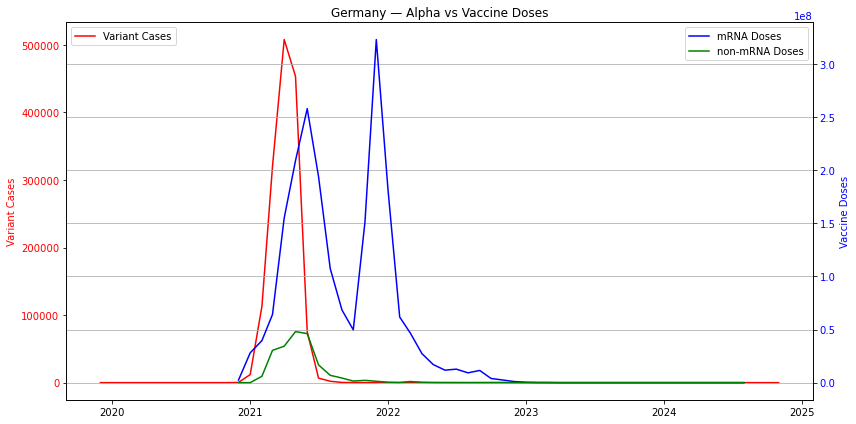

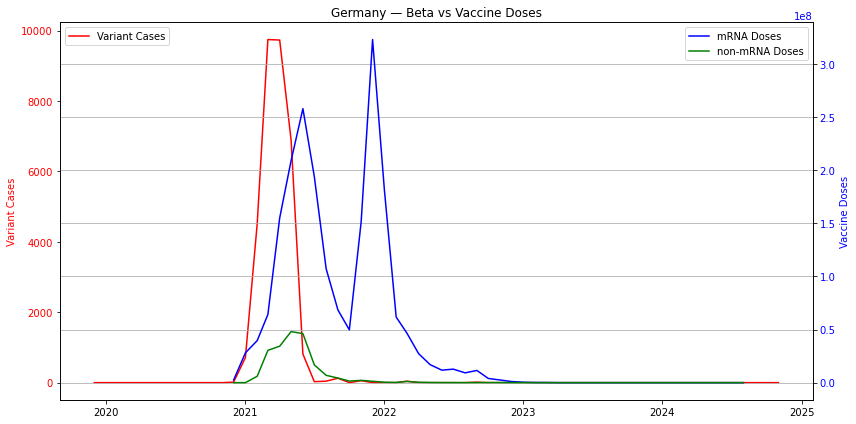

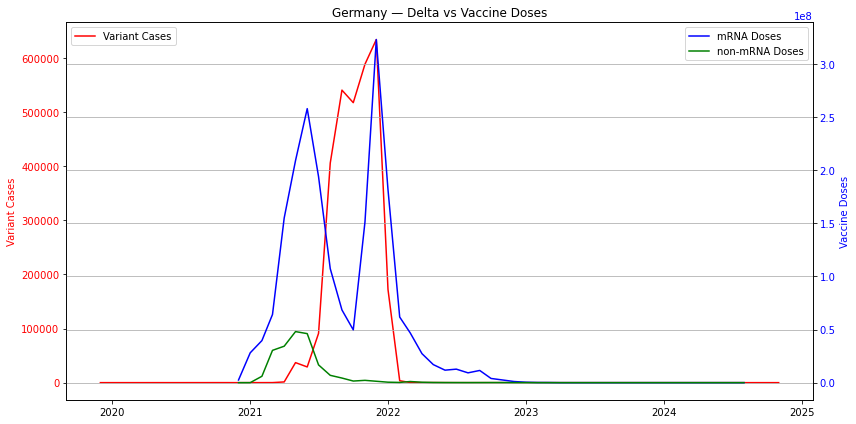

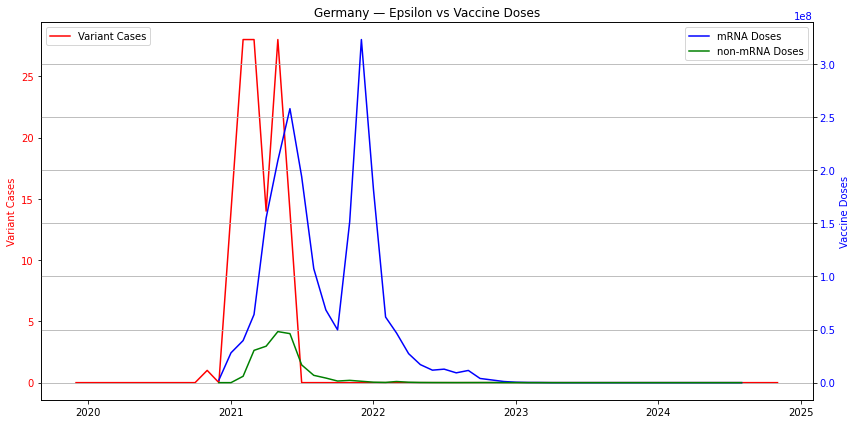

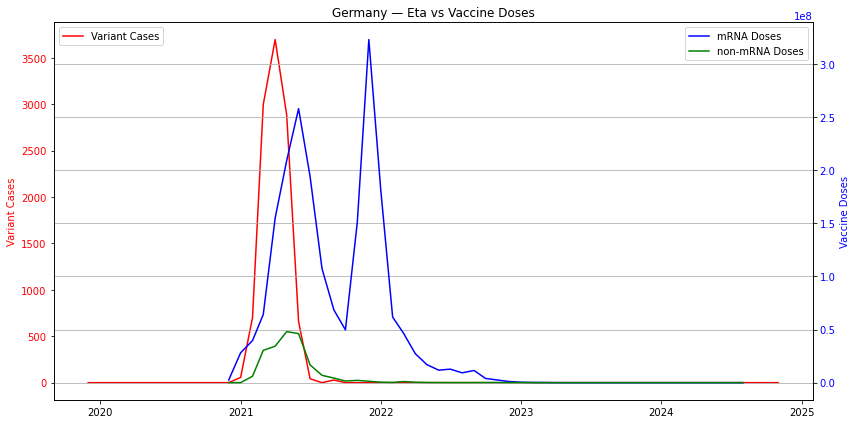

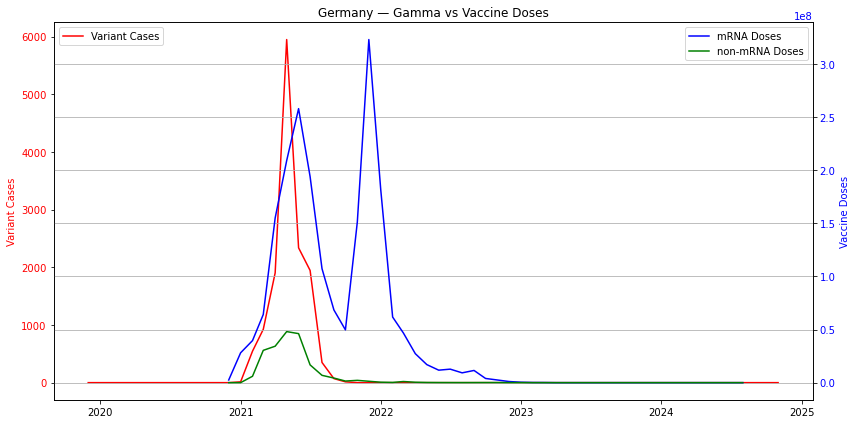

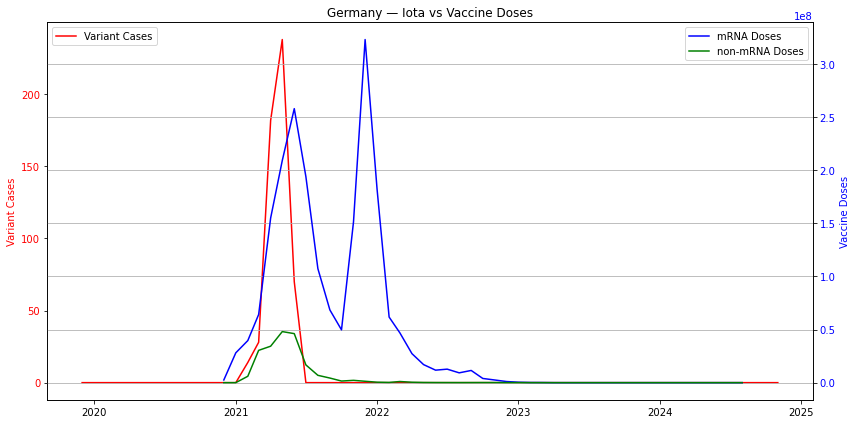

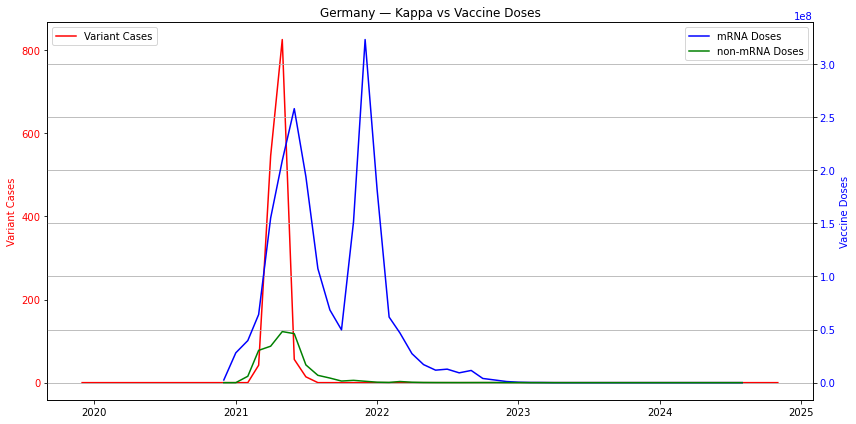

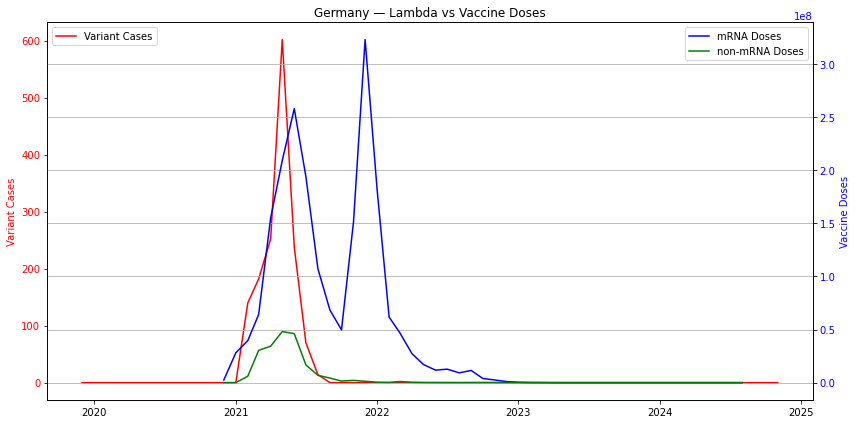

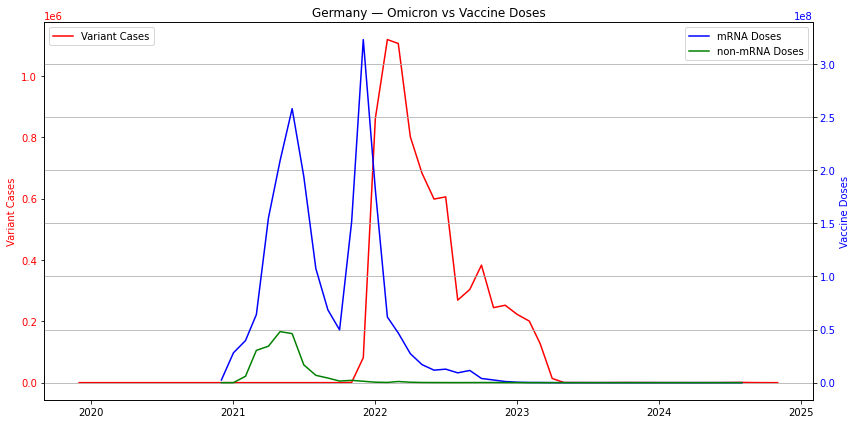

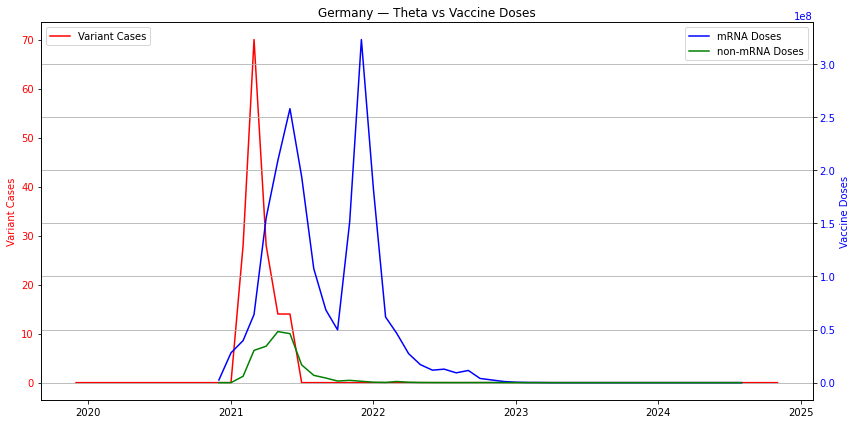

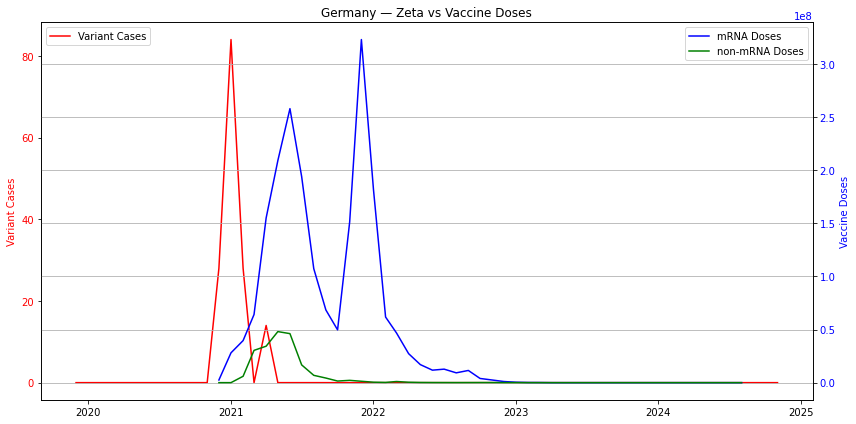

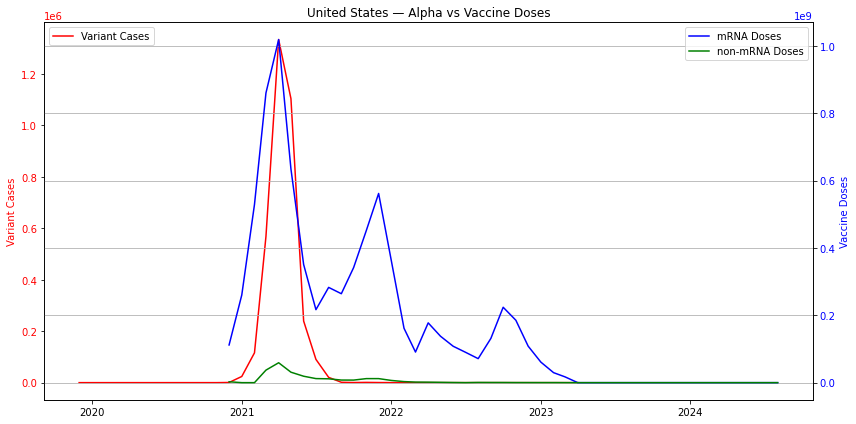

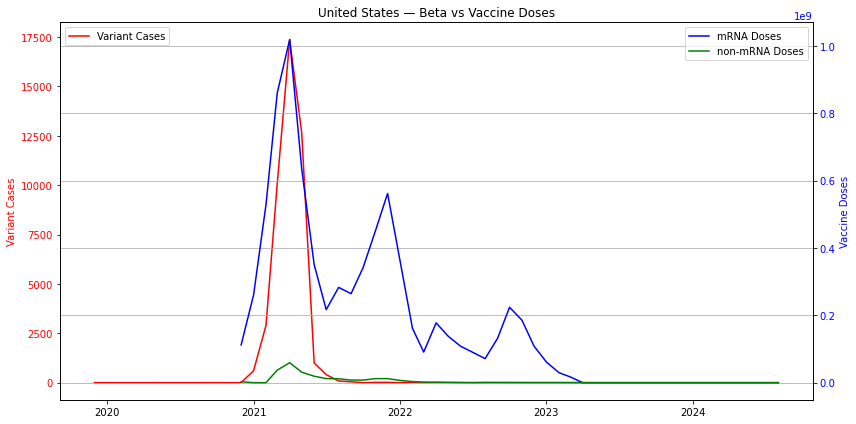

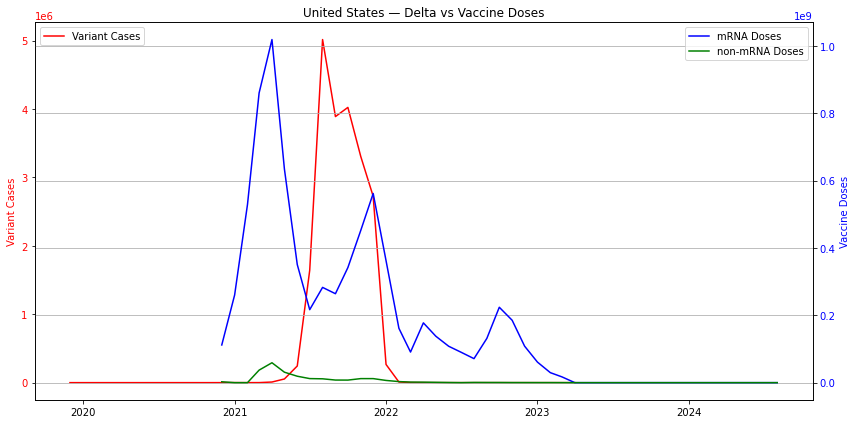

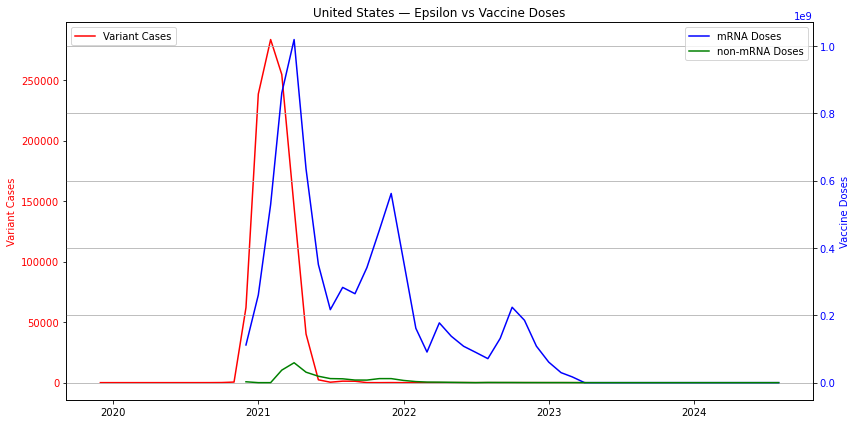

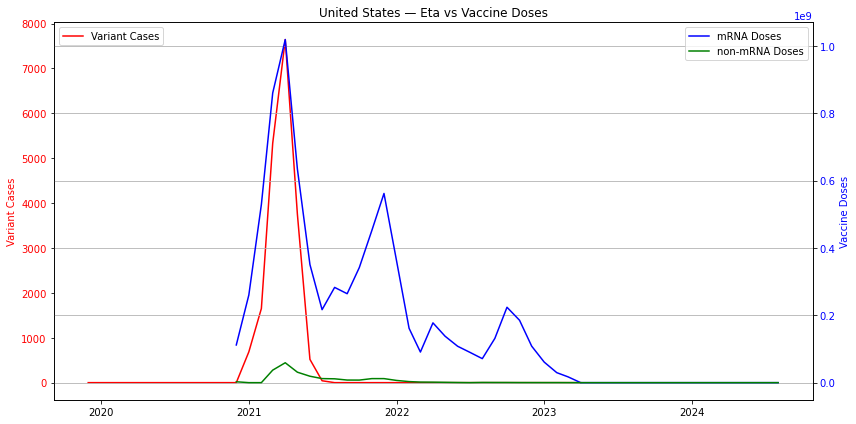

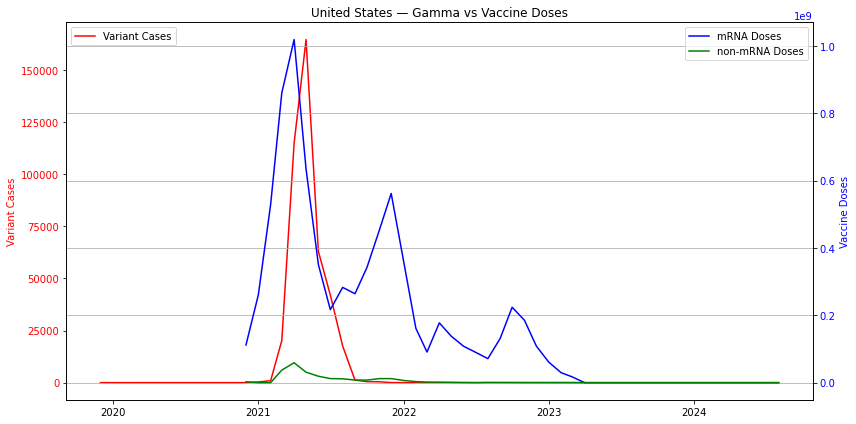

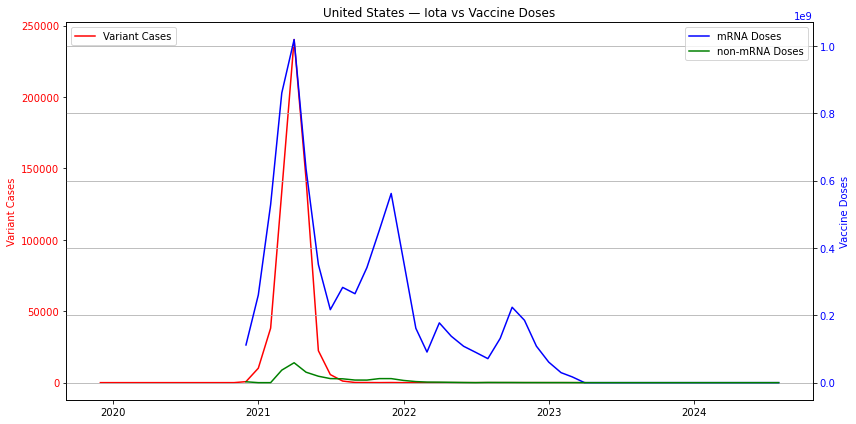

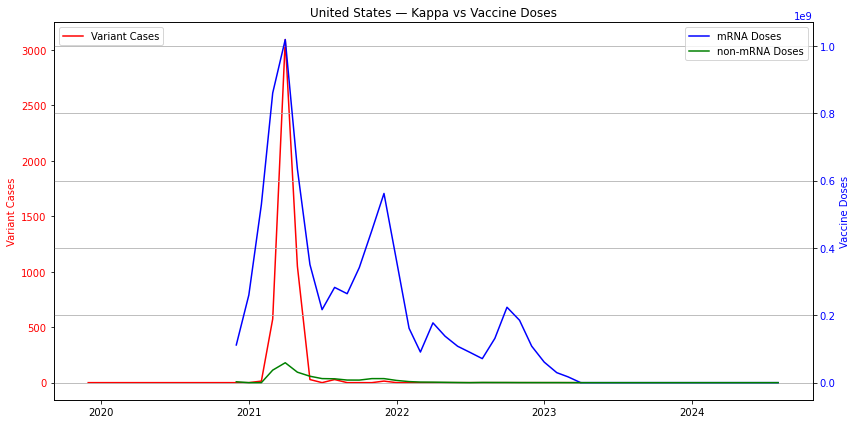

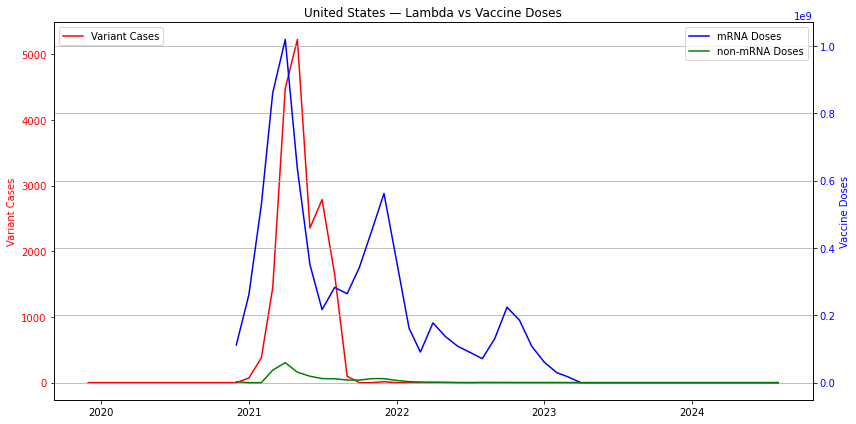

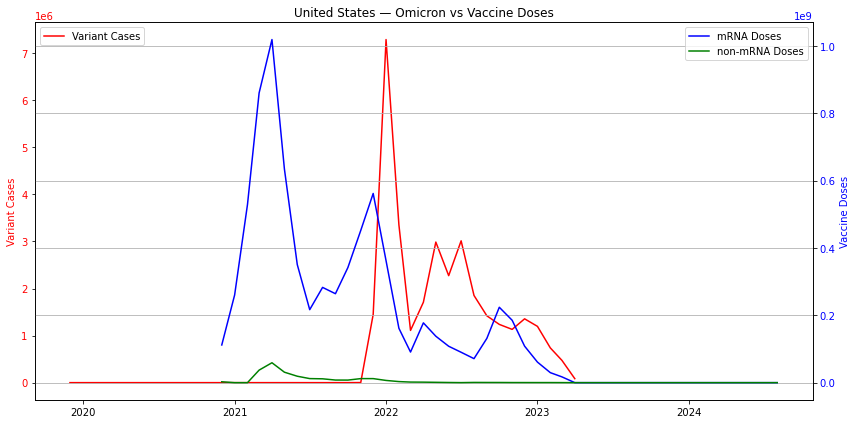

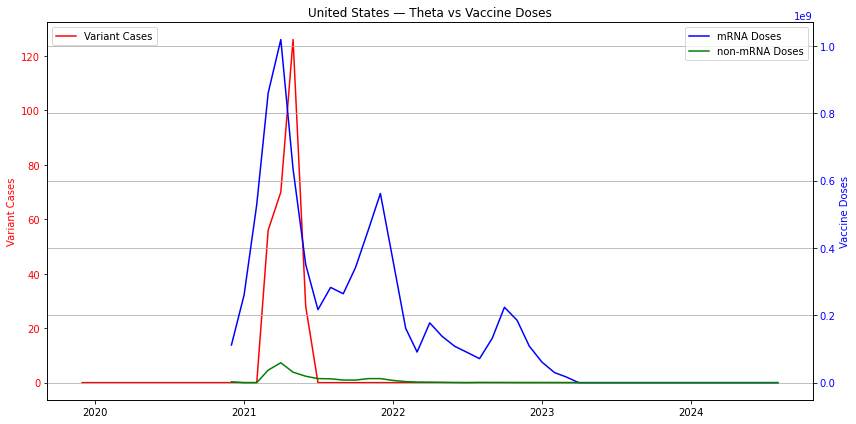

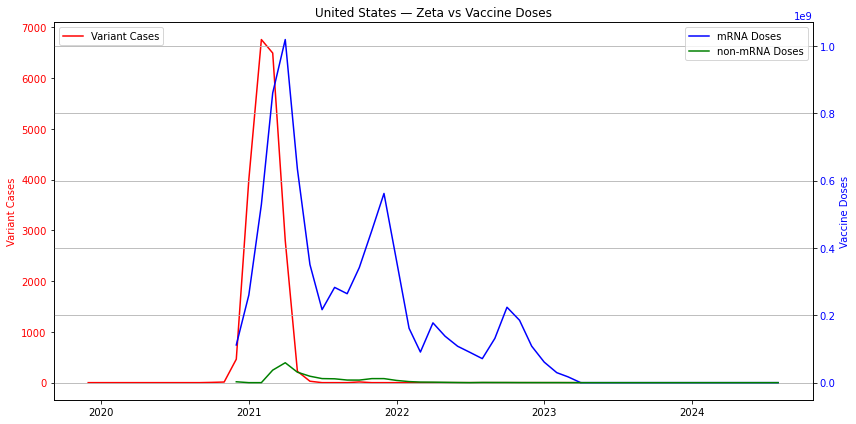

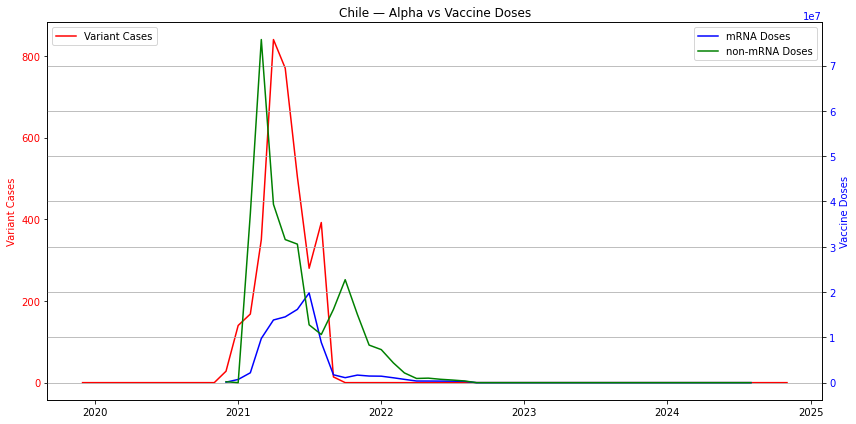

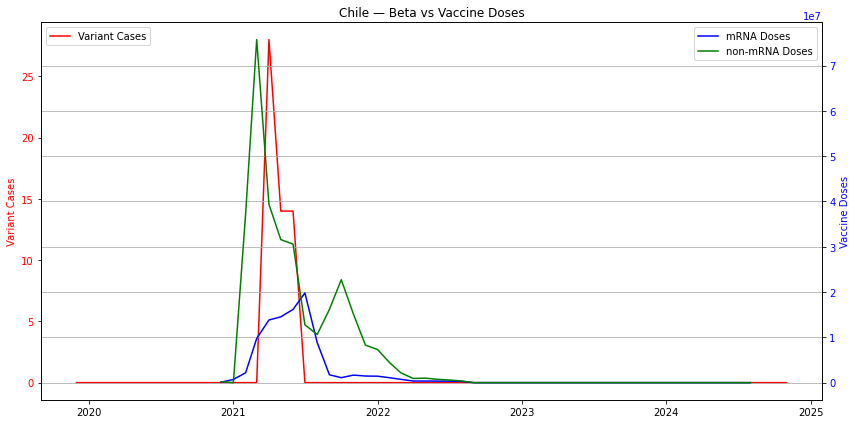

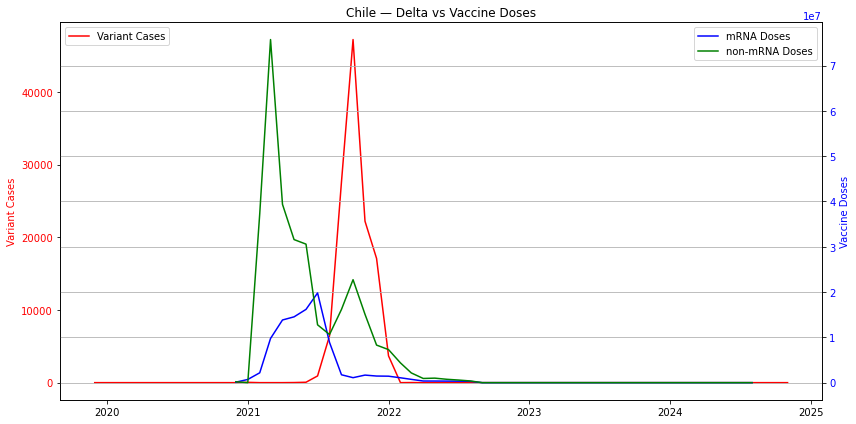

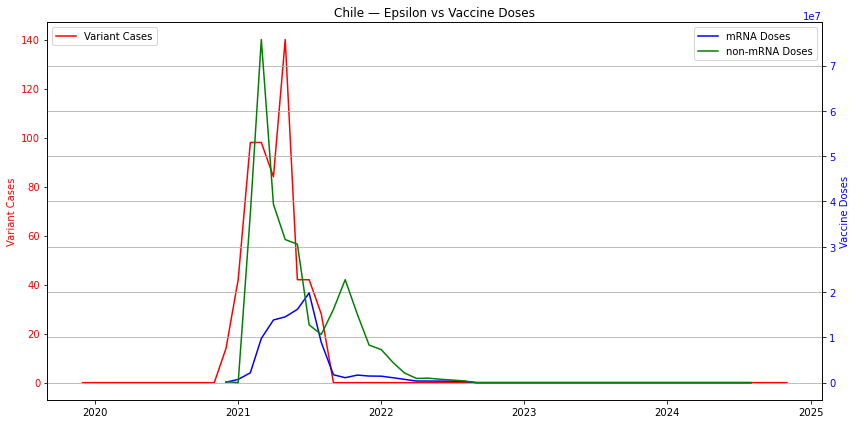

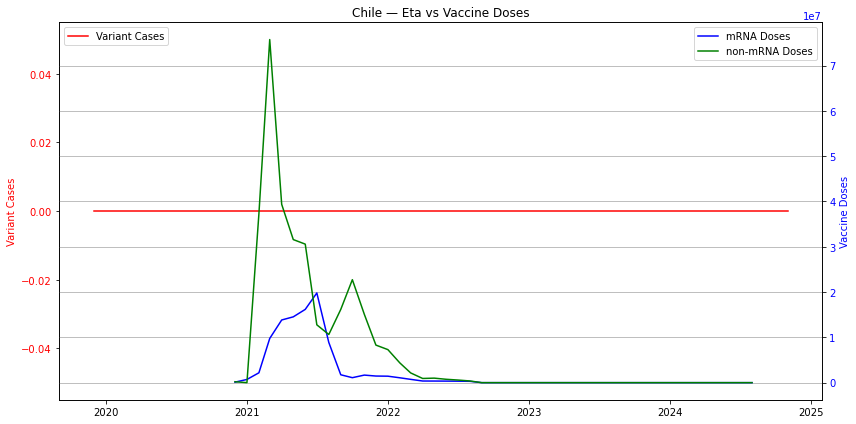

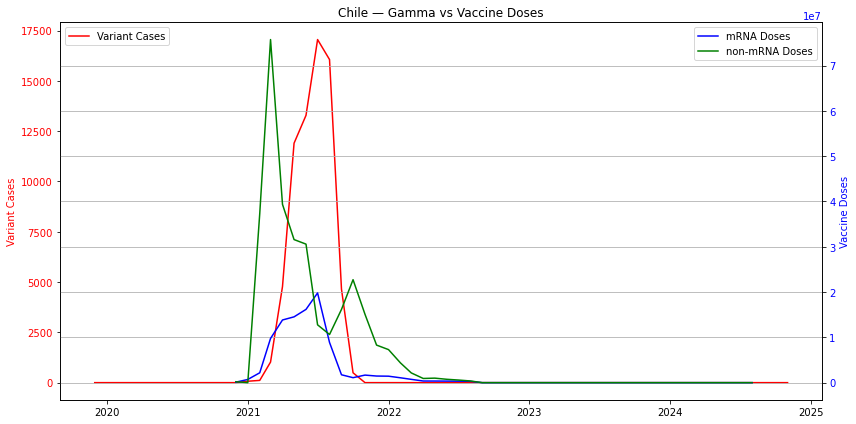

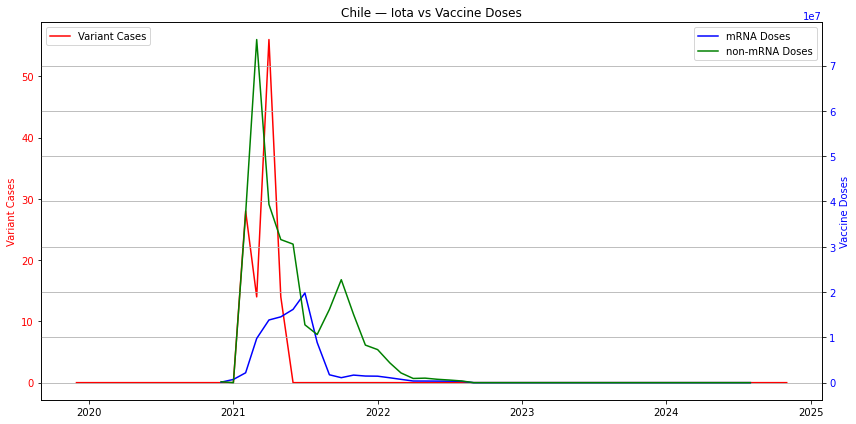

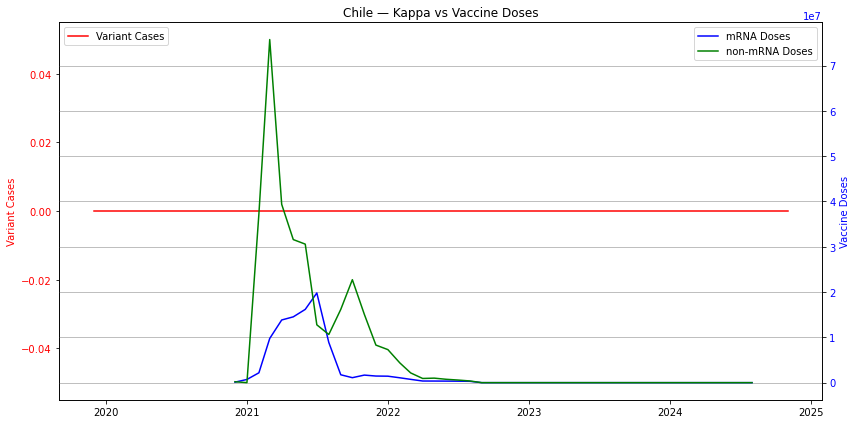

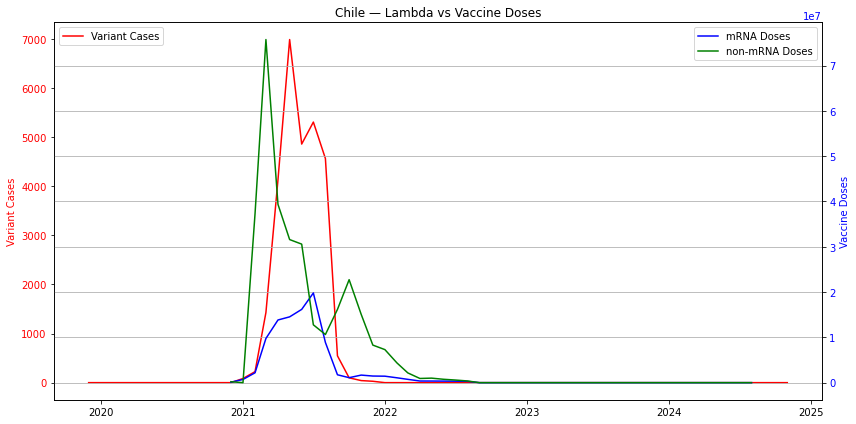

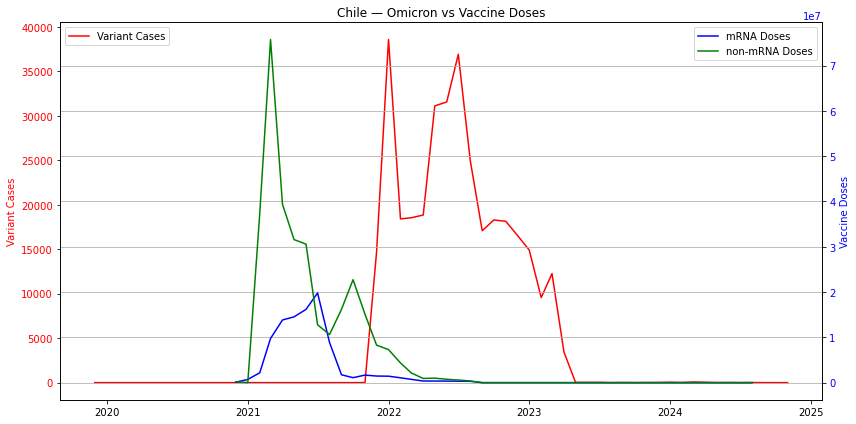

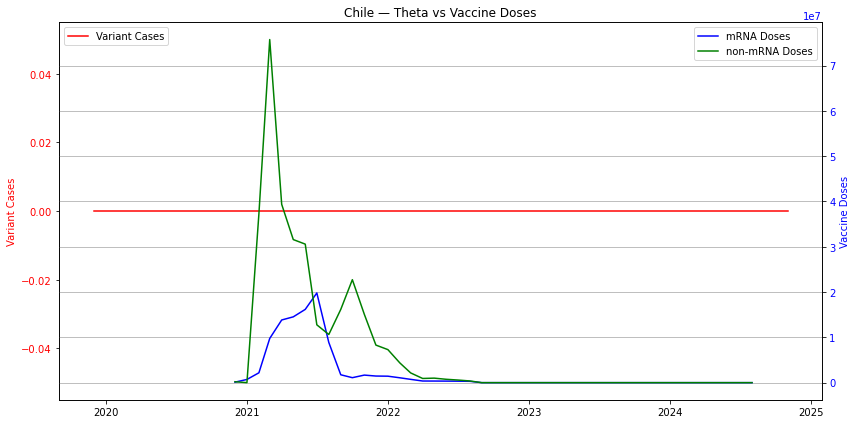

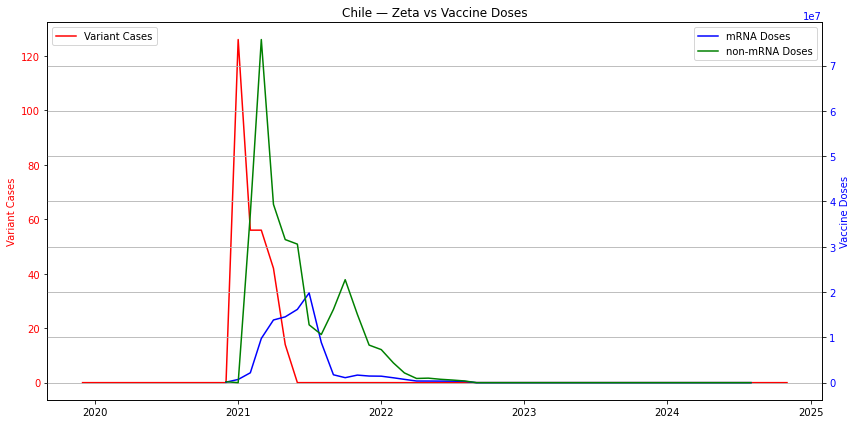

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Vaccine type mapping
vaccine_type_map = {
    'Pfizer/BioNTech': 'mRNA',
    'Moderna': 'mRNA',
    
    # non-mRNA vaccines
    'CanSino': 'non-mRNA',
    'Covaxin': 'non-mRNA',
    'Johnson&Johnson': 'non-mRNA',
    'Medicago': 'non-mRNA',
    'Novavax': 'non-mRNA',
    'Oxford/AstraZeneca': 'non-mRNA',
    'SKYCovione': 'non-mRNA',
    'Sanofi/GSK': 'non-mRNA',
    'Sinopharm/Beijing': 'non-mRNA',
    'Sinovac': 'non-mRNA',
    'Sputnik V': 'non-mRNA',
    'Valneva': 'non-mRNA'
}

# Apply mapping
combined_df['Vaccine Type'] = combined_df['Manufacturer'].map(vaccine_type_map)

# Filter for selected countries
countries_of_interest = ['Germany', 'United States','Chile']
filtered_df = combined_df[combined_df['Country'].isin(countries_of_interest)]

for country in countries_of_interest:
    country_df = filtered_df[filtered_df['Country'] == country]
    
    # Variant trend
    variant_trend = (
        country_df
        .groupby(['Month', 'Variant'], as_index=False)['Monthly Value']
        .sum()
        .pivot(index='Month', columns='Variant', values='Monthly Value')
    )
    
    # Vaccine trend
    vaccine_trend = (
        country_df
        .groupby(['Month', 'Vaccine Type'], as_index=False)['Monthly Doses']
        .sum()
        .pivot(index='Month', columns='Vaccine Type', values='Monthly Doses')
    )
    
    for variant_name in variant_trend.columns:
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # Plot Variant Cases
        variant_series = variant_trend[variant_name].fillna(0)
        ax1.plot(variant_series.index.to_numpy(), variant_series.to_numpy(), color='red', label='Variant Cases')
        ax1.set_ylabel('Variant Cases', color='red')
        ax1.tick_params(axis='y', labelcolor='red')
        
        # Create secondary axis
        ax2 = ax1.twinx()
        
        # Safe fetch vaccine series
        mrna_series = vaccine_trend.get('mRNA', pd.Series(index=variant_series.index, dtype=float)).fillna(0)
        non_mrna_series = vaccine_trend.get('non-mRNA', pd.Series(index=variant_series.index, dtype=float)).fillna(0)
        
        ax2.plot(mrna_series.index.to_numpy(), mrna_series.to_numpy(), label='mRNA Doses', color='blue')
        ax2.plot(non_mrna_series.index.to_numpy(), non_mrna_series.to_numpy(), label='non-mRNA Doses', color='green')
        ax2.set_ylabel('Vaccine Doses', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        
        # Title and layout
        plt.title(f'{country} — {variant_name} vs Vaccine Doses')
        fig.tight_layout()
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        plt.grid(True)
        plt.show()


In [58]:
# Define mRNA and non-mRNA manufacturers
vaccine_type_map = {
    'Pfizer/BioNTech': 'mRNA',
    'Moderna': 'mRNA',
    'CanSino': 'non-mRNA',
    'AstraZeneca': 'non-mRNA',
    'Johnson&Johnson': 'non-mRNA',
    'Sinovac': 'non-mRNA',
    'Sinopharm': 'non-mRNA',
    'Sputnik V': 'non-mRNA',
    'Covaxin': 'non-mRNA',
    'Covovax': 'non-mRNA',
    # Add more as needed
}

# Add a column for Vaccine Type
combined_df['Vaccine Type'] = combined_df['Manufacturer'].map(vaccine_type_map)


In [59]:
vaccine_summary = (
    combined_df
    .groupby(['Month', 'Vaccine Type'], as_index=False)['Monthly Doses']
    .sum()
)


In [60]:
variant_summary = (
    combined_df
    .groupby(['Month', 'Variant'], as_index=False)['Monthly Value']
    .sum()
)


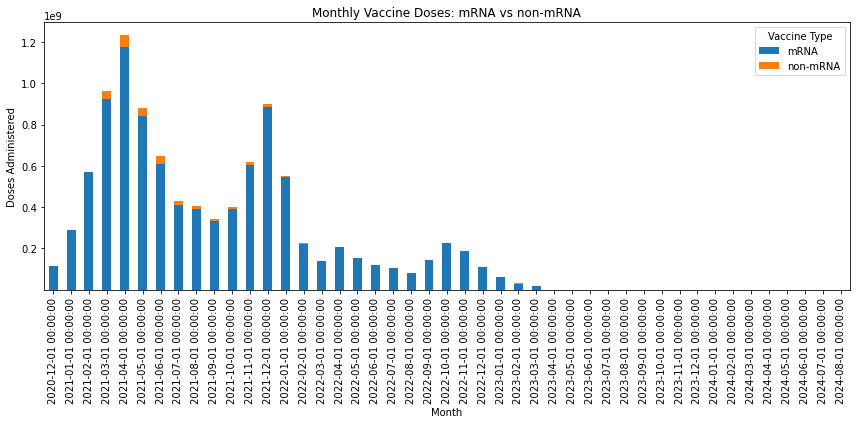

In [64]:
import matplotlib.pyplot as plt

# Pivot for plotting
pivoted = vaccine_summary.pivot(index='Month', columns='Vaccine Type', values='Monthly Doses')
pivoted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Vaccine Doses: mRNA vs non-mRNA')
plt.ylabel('Doses Administered')
plt.tight_layout()
plt.show()


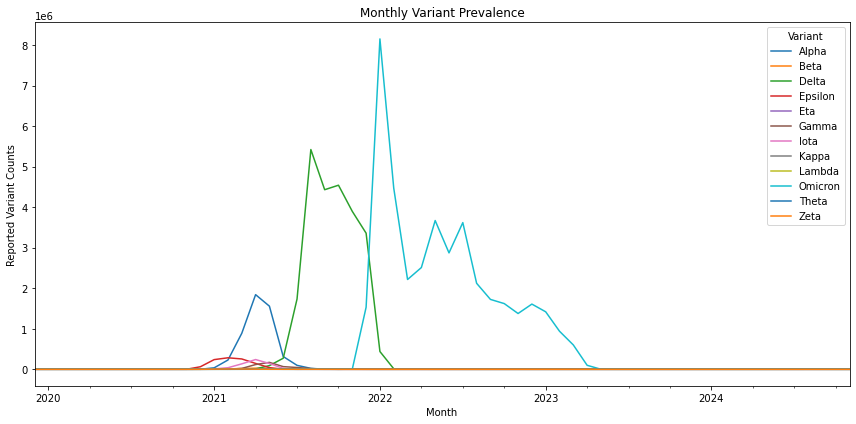

In [62]:
variant_pivot = variant_summary.pivot(index='Month', columns='Variant', values='Monthly Value')
variant_pivot.plot(figsize=(12, 6))
plt.title('Monthly Variant Prevalence')
plt.ylabel('Reported Variant Counts')
plt.tight_layout()
plt.show()


In [65]:
vaccine_by_country = (
    combined_df
    .groupby(['Country', 'Month', 'Vaccine Type'], as_index=False)['Monthly Doses']
    .sum()
)


In [66]:
variant_by_country = (
    combined_df
    .groupby(['Country', 'Month', 'Variant'], as_index=False)['Monthly Value']
    .sum()
)


In [67]:
country = 'Germany'

# Filter vaccine data
vax_germany = vaccine_by_country[vaccine_by_country['Country'] == country]

# Filter variant data
variant_germany = variant_by_country[variant_by_country['Country'] == country]


In [68]:
# Pivot vaccines
vax_pivot = vax_germany.pivot(index='Month', columns='Vaccine Type', values='Monthly Doses').fillna(0)

# Pivot variants
variant_pivot = variant_germany.pivot(index='Month', columns='Variant', values='Monthly Value').fillna(0)

# Join both on Month
comparison_df = vax_pivot.join(variant_pivot, how='outer')
